# k-means Clustering

The k-means algorithm follows an iterative process to find the optimal clustering solution. Let's dive into the steps:

1. **Initialization**
   - Randomly select **k** cluster centers from the given dataset. These initial centers represent the initial cluster assignments.
   - The value of **k** needs to be predefined based on the desired number of clusters.

2. **Assignment**
   - Assign each data point to the nearest cluster center based on a distance metric, commonly the **Euclidean distance**.
   - Each data point is assigned to the cluster with the closest center, forming initial clusters.

3. **Update**
   - Recalculate the cluster centers based on the mean of the data points assigned to each cluster.
   - Compute the centroid of each cluster, which is the average position of all the data points within that cluster.

4. **Convergence Check**
   - Check if the cluster centers have changed after the update step.
   - If the cluster centers remain the same, the algorithm has converged, and the final cluster assignments can be obtained.
   - Otherwise, go back to the assignment step and repeat the process.

5. **Repeat**
   - Iterate between the assignment and update steps until convergence is reached.
   - The algorithm continues to reassign data points and update cluster centers until the cluster centers stabilize and no longer change significantly.

## Inertia: Evaluating Cluster Quality

- Inertia, also known as the **within-cluster sum of squares**, is a metric used to evaluate the quality of the clustering.
- It measures the sum of squared distances between each data point and its assigned cluster center.
- A lower inertia value indicates better clustering results.
- The inertia is calculated using the following formula:

$$
I = \sum_{c=1}^{k} \sum_{x \in \text{cluster}_c} \left\| x - c_c \right\|^2
$$

where:
- $k$ is the number of clusters.
- $c_c$ is the centroid (cluster center) of $\text{cluster}_c$.
- $x$ represents a data point within $\text{cluster}_c$.
- $\left\| x - c_c \right\|^2$ denotes the squared Euclidean distance between $x$ and $c_c$.

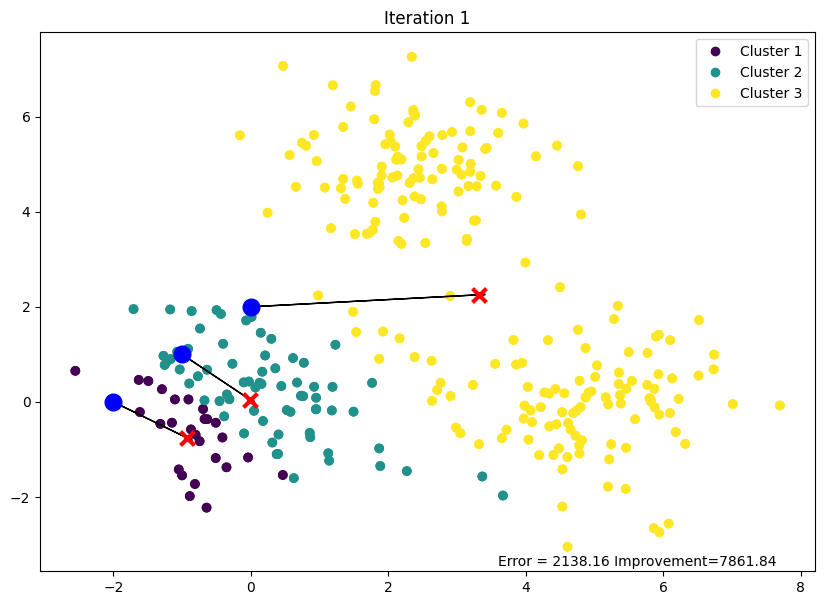

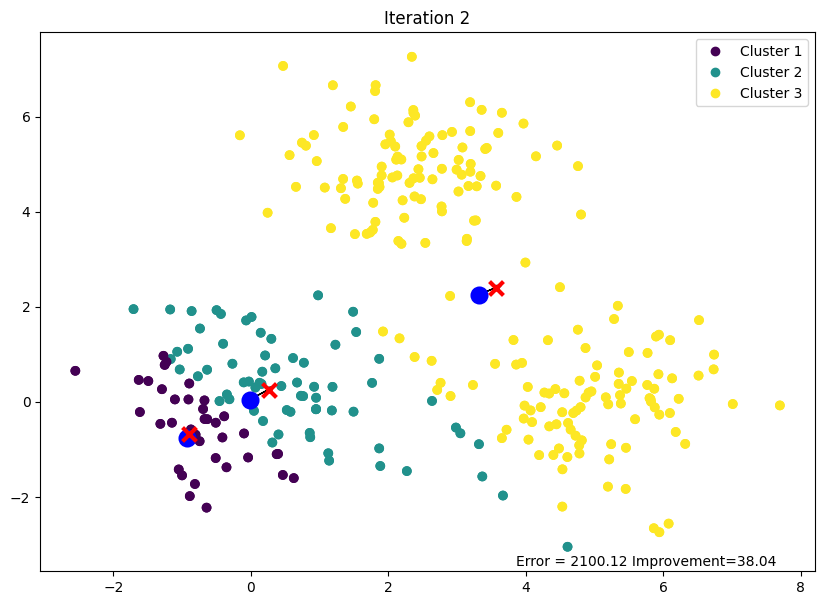

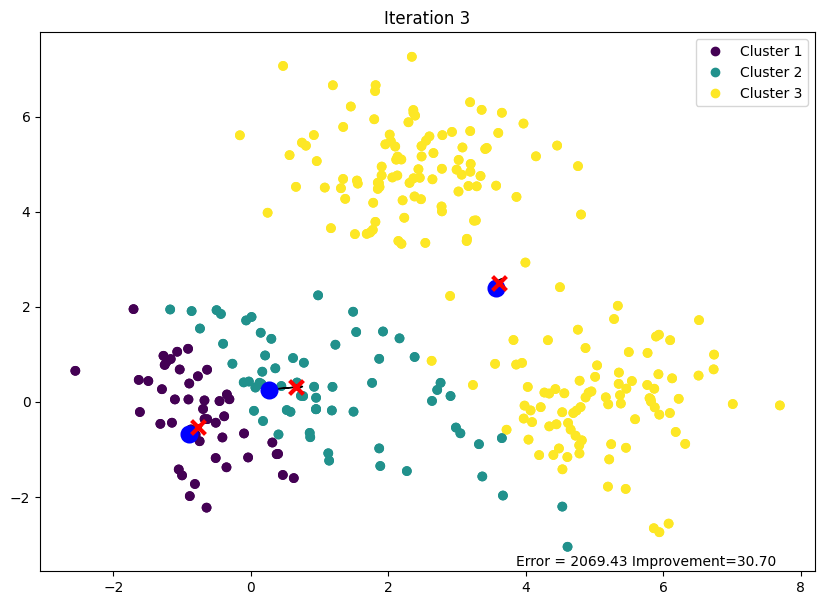

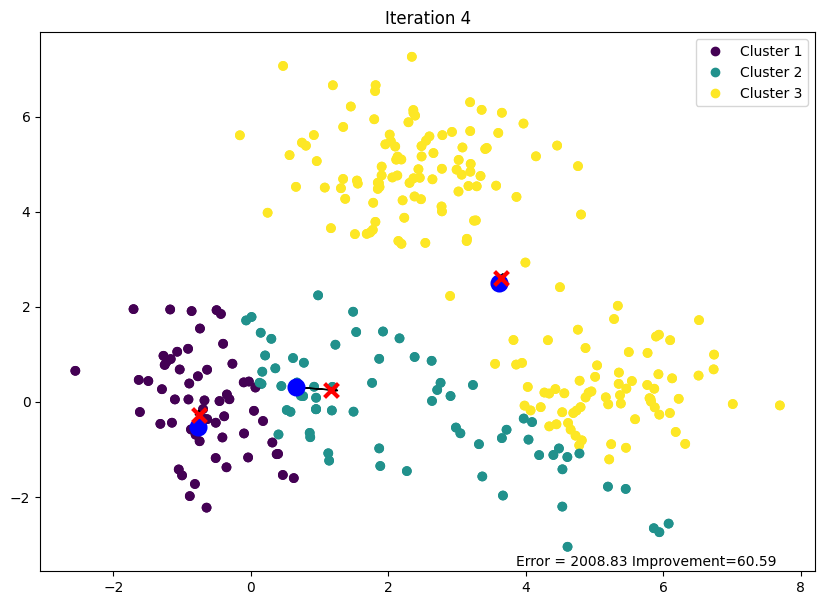

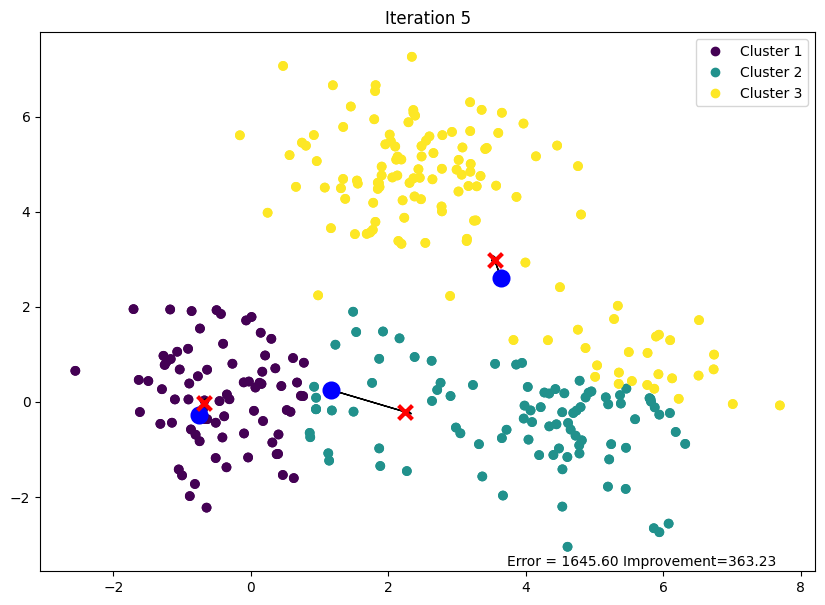

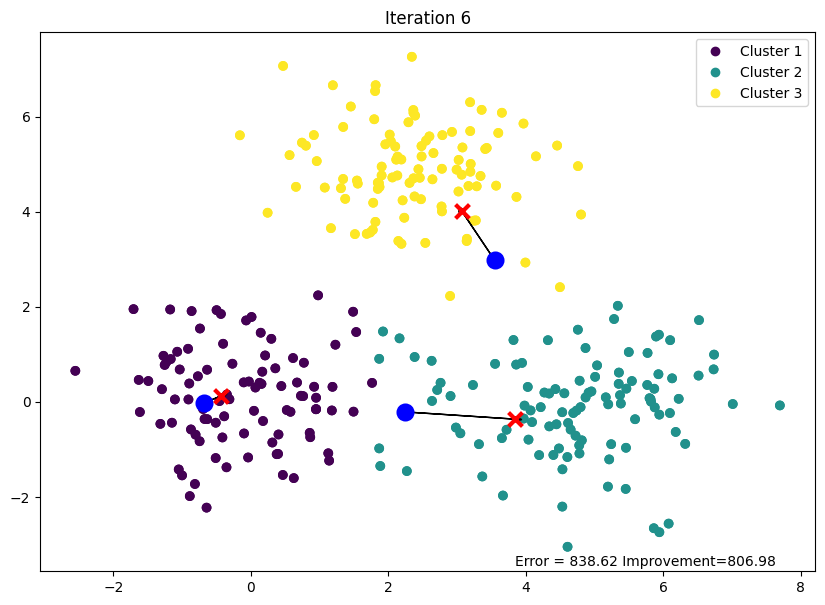

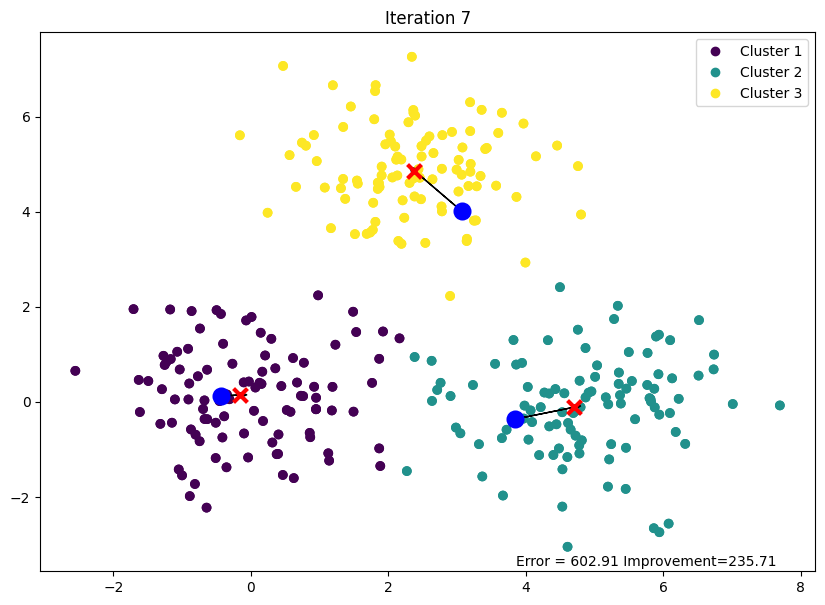

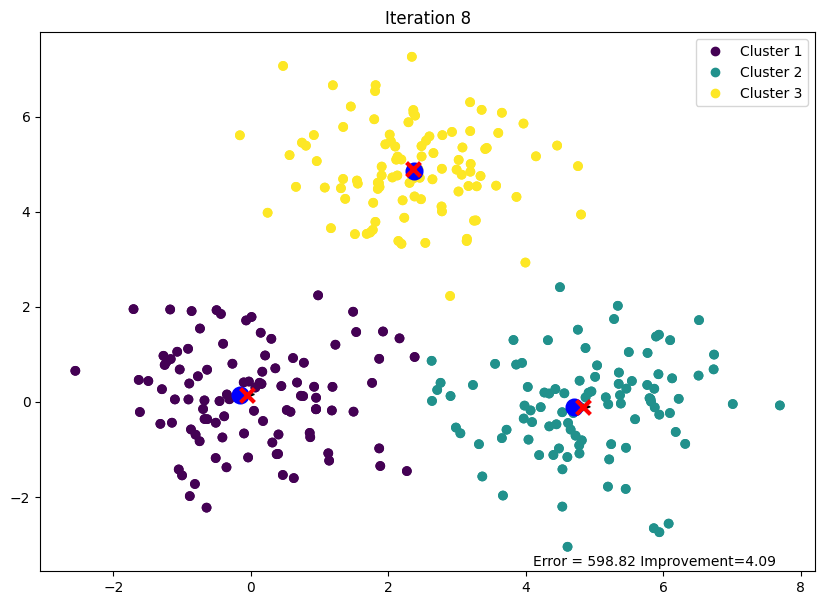

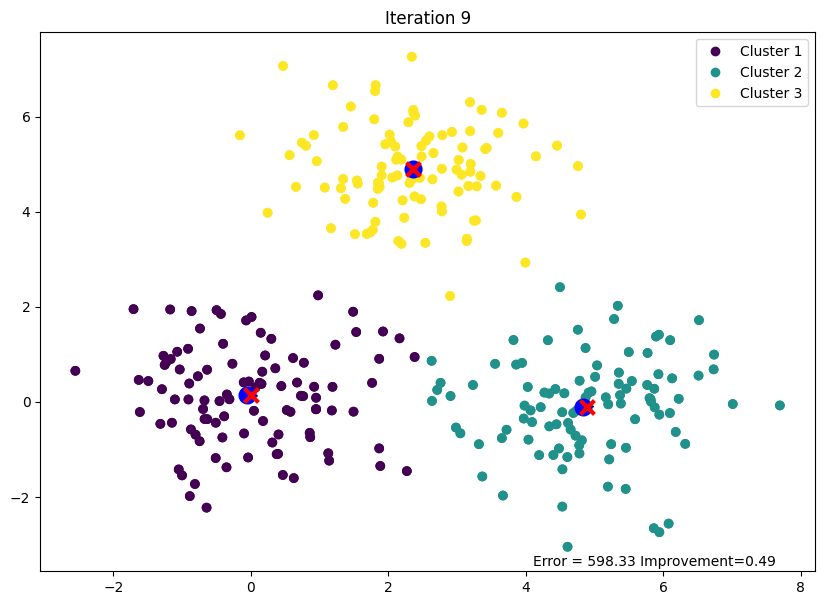

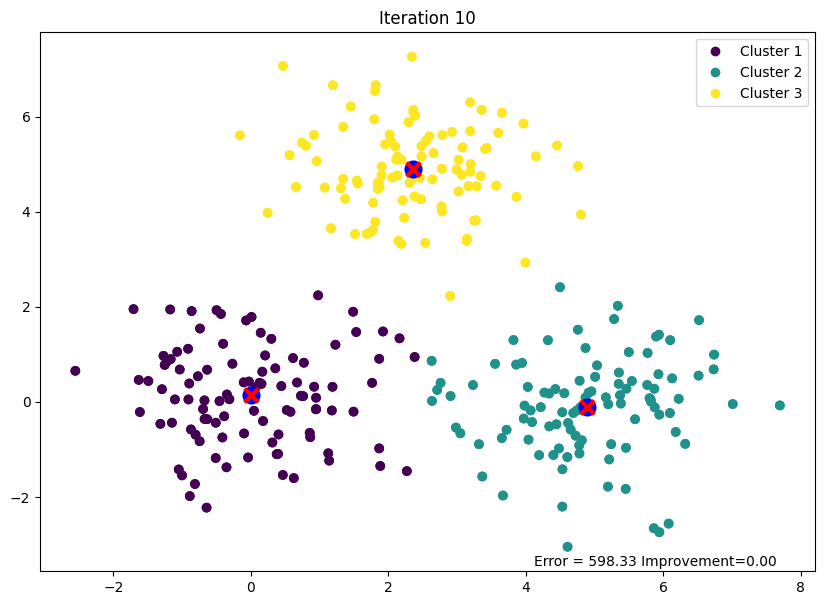

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
# set the seed to reproduce the results
np.random.seed(0)
# Generate random data with 3 clusters and 100 samples with 2 features using gaussian mixture model
X = np.random.multivariate_normal([0, 0], [[1, 0], [0, 1]], 100)
X = np.concatenate((X, np.random.multivariate_normal([2.5, 5], [[1, 0], [0, 1]], 100)))
X = np.concatenate((X, np.random.multivariate_normal([5, 0], [[1, 0], [0, 1]], 100)))  

# Set initial cluster centers to be far away from the actual cluster centers
old_centers = np.array([[-2,0],[-1,1],[0,2]])
old_inertia = 10000

# Visualize the clustering process
for i in range(10):
    # run the KMeans for 1 iteration so we can follow the clustering process
    kmeans = KMeans(n_clusters=3, init=old_centers, max_iter=1, n_init=1).fit(X)
    new_centers = kmeans.cluster_centers_
    new_inertia = kmeans.inertia_
    # plot the data points and cluster centers
    plt.figure(figsize=(10, 7))
    plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)
    # plot the inertia value as a text box on the plot
    plt.text(0.95, 0.01, f'Error = {kmeans.inertia_:.2f} Improvement={old_inertia-new_inertia:.2f}', transform=plt.gca().transAxes, size=10, horizontalalignment='right')
    # add legend to the plot for the cluster labels
    plt.legend(handles=plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_).legend_elements()[0], labels=['Cluster 1', 'Cluster 2', 'Cluster 3'])
    # plot old and new cluster centers wiht arrows from old to new centers 
    for j in range(len(old_centers)):
        plt.arrow(old_centers[j, 0], old_centers[j, 1], new_centers[j, 0]-old_centers[j, 0], new_centers[j, 1]-old_centers[j, 1], head_width=0.1, head_length=0.1, fc='k', ec='k')
    plt.scatter(old_centers[:, 0], old_centers[:, 1], marker='o', s=100, linewidths=3, color='b')
    plt.scatter(new_centers[:, 0], new_centers[:, 1], marker='x', s=100, linewidths=3, color='r')

    plt.title('Iteration {}'.format(i+1))
    plt.show()
    old_centers = new_centers
    old_inertia = new_inertia

# k-means Clustering and Initialization

Initialization is a crucial step in k-means as it determines the initial cluster centers and can influence the final clustering results.
A bad initialization may result in poor convergence or clustering solutions that do not capture the underlying patterns in the data.
Randomly selecting initial cluster centers can lead to undesirable outcomes.

## Overcoming Bad Initializations

To mitigate the impact of bad initializations, several techniques can be employed:

1. **Multiple Initializations**
   - Run the k-means algorithm multiple times with different random initializations.
   - By repeating the algorithm with various starting points, you increase the likelihood of finding a good clustering solution.
   - Compare the results from different runs and choose the clustering solution with the lowest inertia or highest overall quality.

2. **K-means++ Initialization**
   - K-means++ is an improved initialization method that aims to select initial cluster centers that are well spread out.
   - It reduces the chances of getting stuck in suboptimal solutions.
   - The k-means++ initialization involves the following steps:
     - Choose the first cluster center uniformly at random from the data points.
     - For each subsequent cluster center, select a data point with a probability proportional to its squared distance from the nearest existing cluster center.
     - Repeat until all k cluster centers have been chosen.

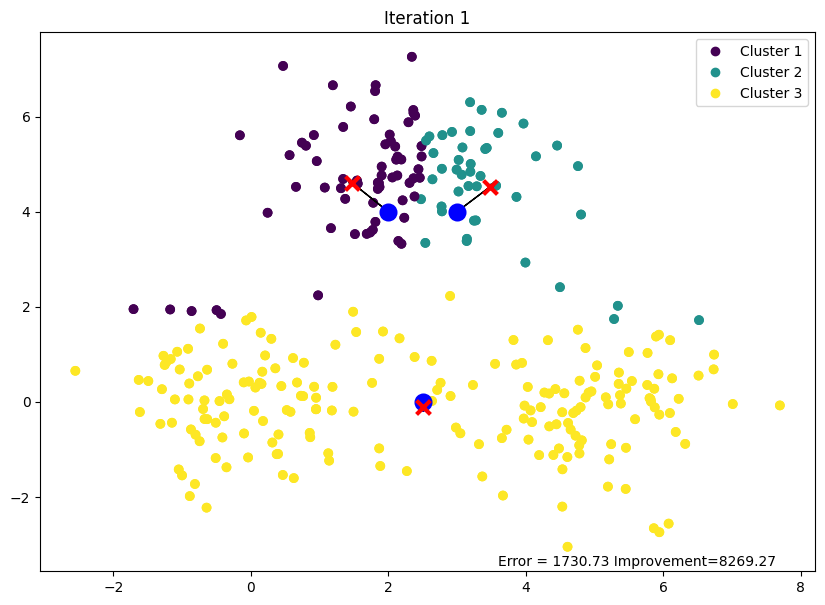

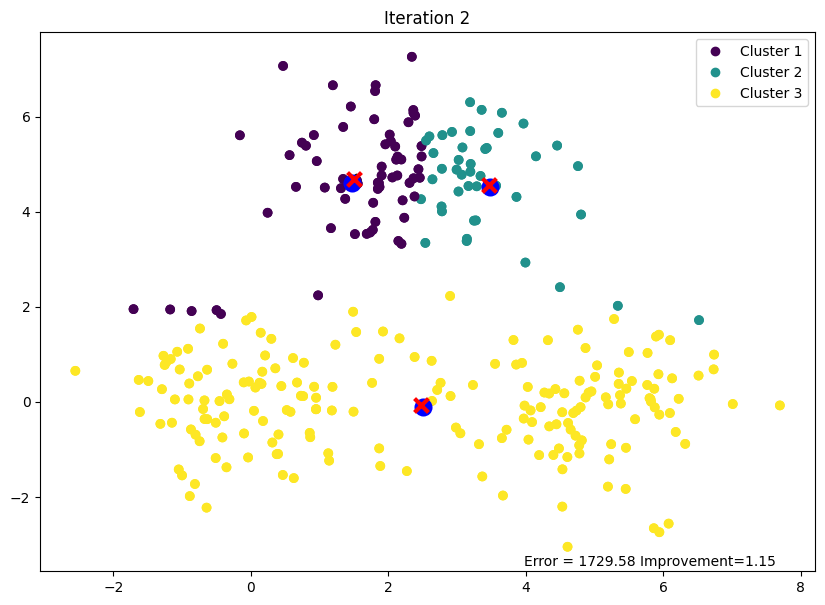

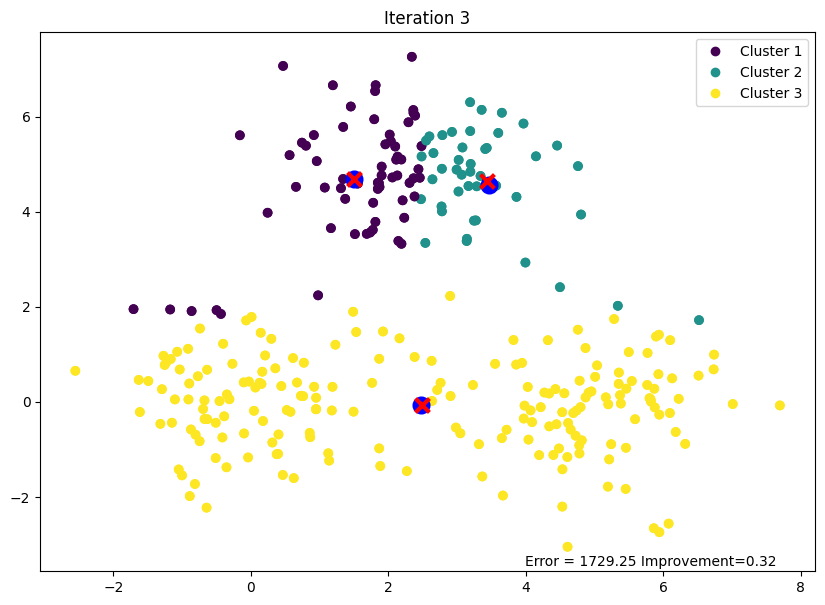

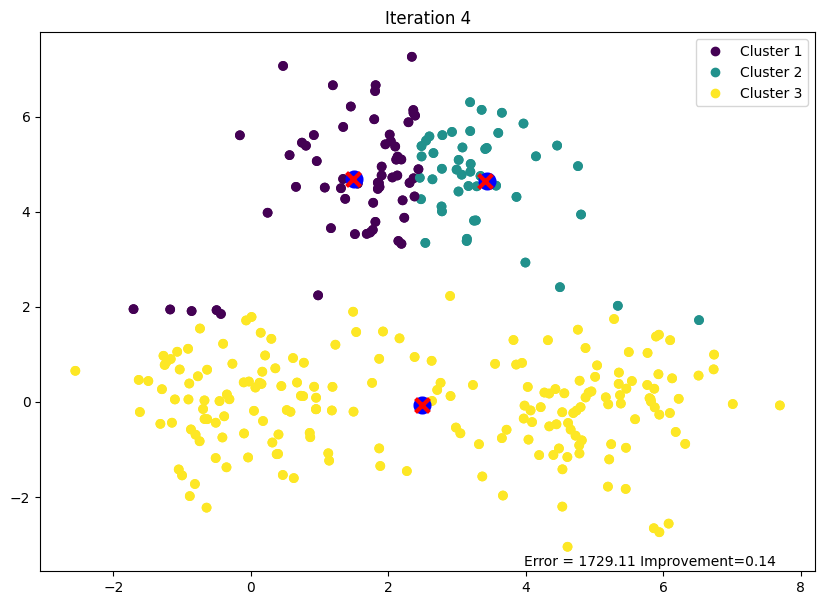

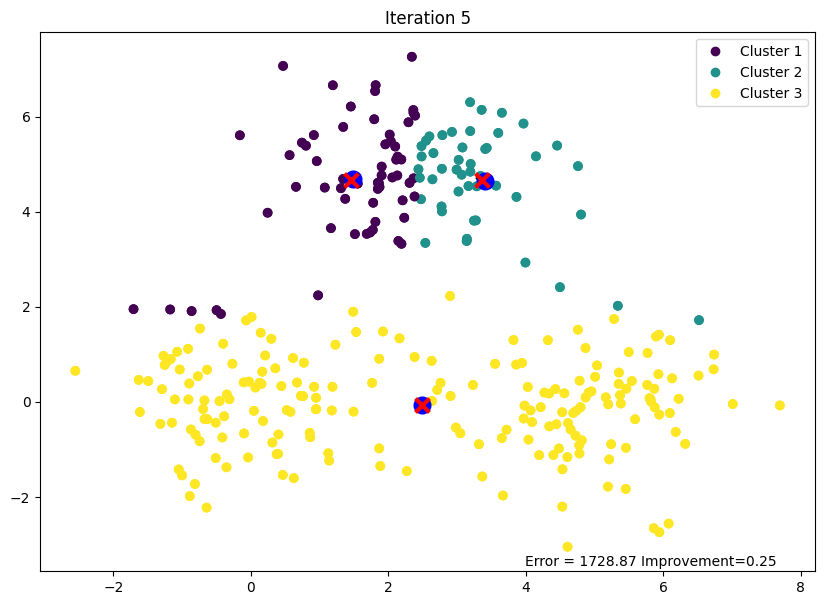

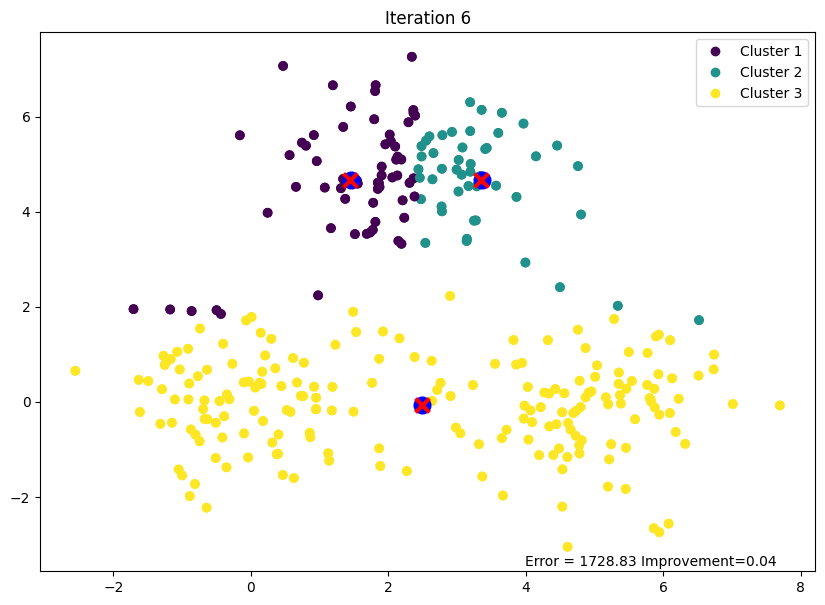

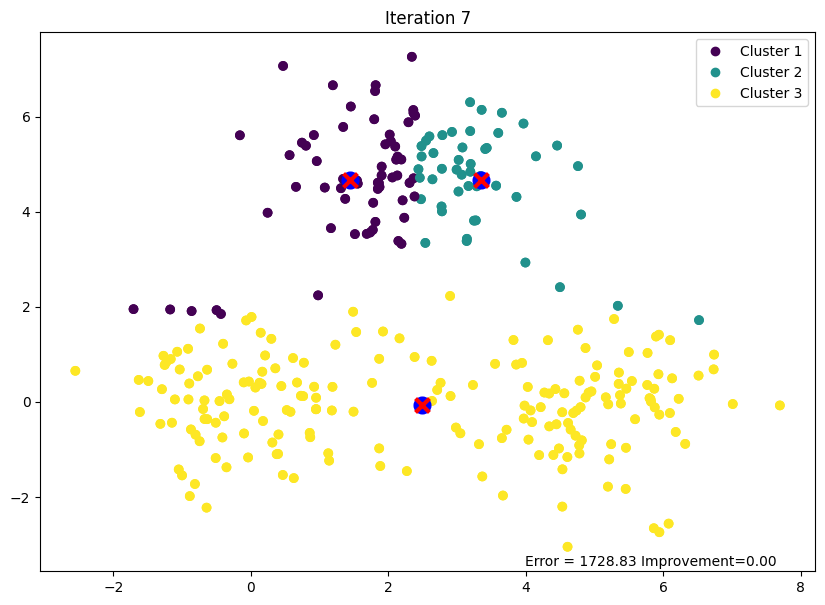

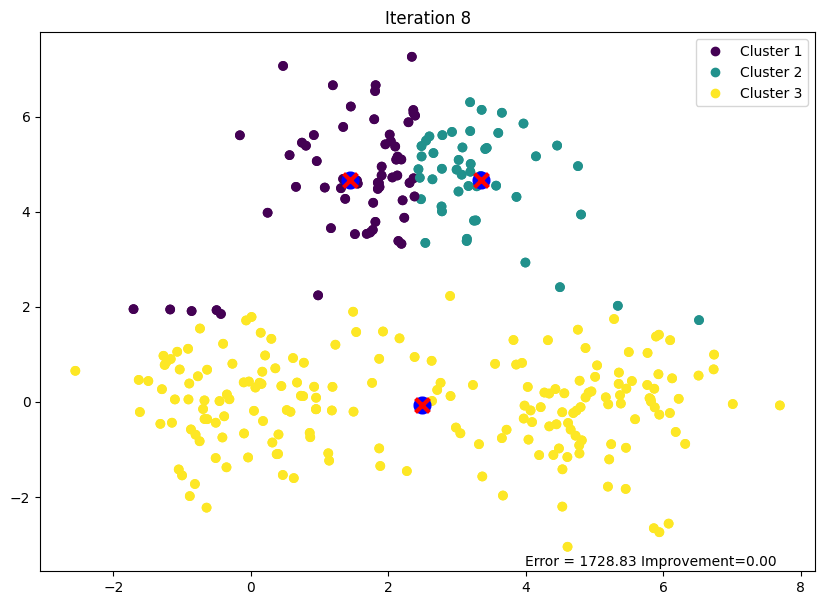

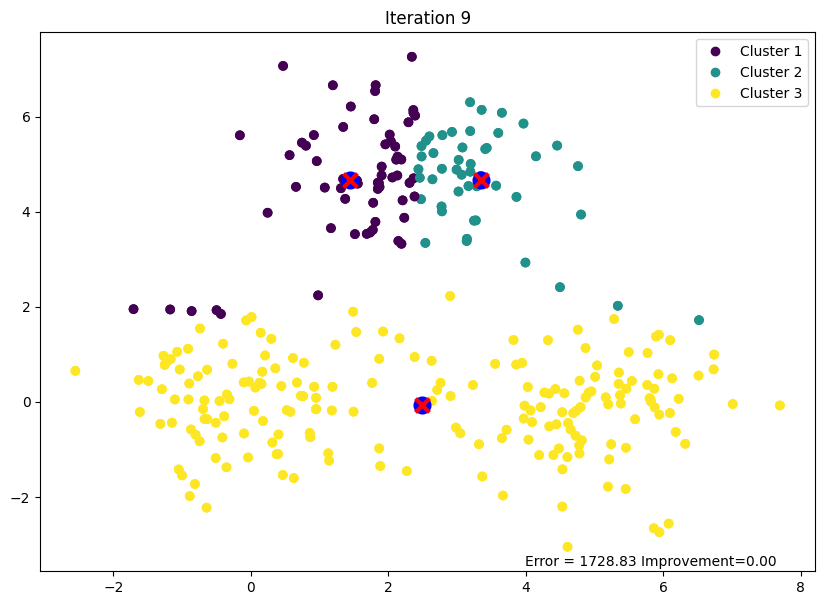

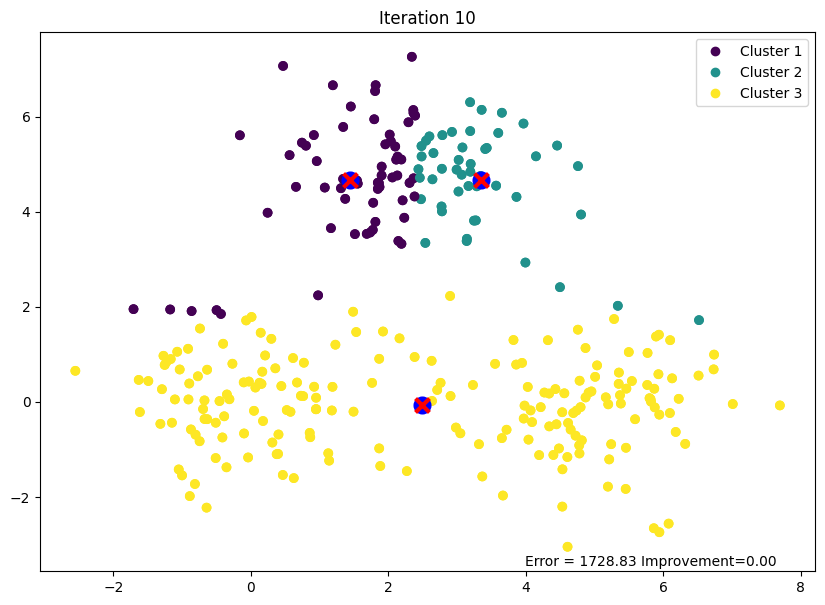

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
# set the seed to reproduce the results
np.random.seed(0)
# Generate random data with 3 clusters and 100 samples with 2 features using gaussian mixture model
X = np.random.multivariate_normal([0, 0], [[1, 0], [0, 1]], 100)
X = np.concatenate((X, np.random.multivariate_normal([2.5, 5], [[1, 0], [0, 1]], 100)))
X = np.concatenate((X, np.random.multivariate_normal([5, 0], [[1, 0], [0, 1]], 100)))   

# Set initial cluster centers to be far away from the actual cluster centers
old_centers = np.array([[2,4],[3,4],[2.5,0]])
old_inertia = 10000

# Visualize the clustering process
for i in range(10):
    # run the KMeans for 1 iteration so we can follow the clustering process
    kmeans = KMeans(n_clusters=3, init=old_centers, max_iter=1, n_init=1).fit(X)
    new_centers = kmeans.cluster_centers_
    new_inertia = kmeans.inertia_
    # plot the data points and cluster centers
    plt.figure(figsize=(10, 7))
    plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)
    # plot the inertia value as a text box on the plot
    plt.text(0.95, 0.01, f'Error = {kmeans.inertia_:.2f} Improvement={old_inertia-new_inertia:.2f}', transform=plt.gca().transAxes, size=10, horizontalalignment='right')
    # add legend to the plot for the cluster labels
    plt.legend(handles=plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_).legend_elements()[0], labels=['Cluster 1', 'Cluster 2', 'Cluster 3'])
    # plot old and new cluster centers wiht arrows from old to new centers 
    for j in range(len(old_centers)):
        plt.arrow(old_centers[j, 0], old_centers[j, 1], new_centers[j, 0]-old_centers[j, 0], new_centers[j, 1]-old_centers[j, 1], head_width=0.1, head_length=0.1, fc='k', ec='k')
    plt.scatter(old_centers[:, 0], old_centers[:, 1], marker='o', s=100, linewidths=3, color='b')
    plt.scatter(new_centers[:, 0], new_centers[:, 1], marker='x', s=100, linewidths=3, color='r')

    plt.title('Iteration {}'.format(i+1))
    plt.show()
    old_centers = new_centers
    old_inertia = new_inertia

# Clustering animation 

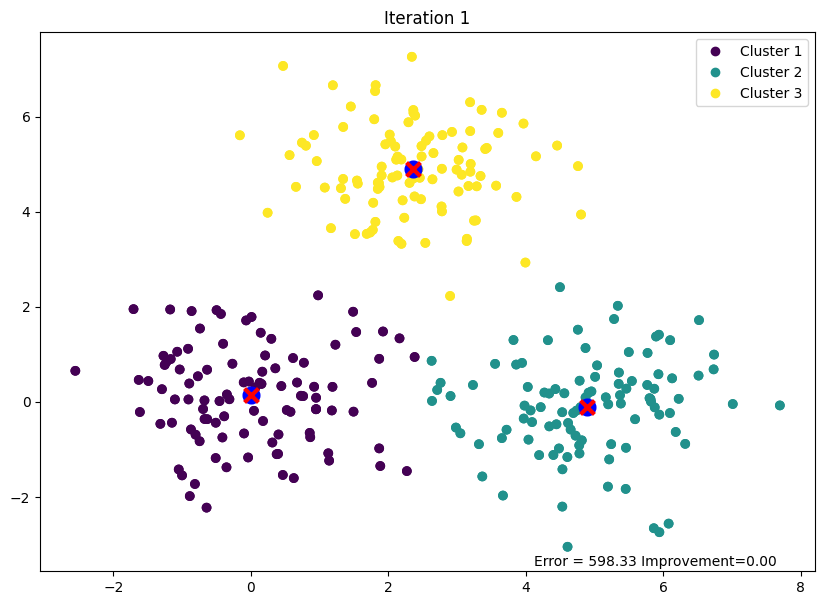

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from PIL import Image

# set the seed to reproduce the results
np.random.seed(0)

# Generate random data with 3 clusters and 100 samples with 2 features using gaussian mixture model
X = np.random.multivariate_normal([0, 0], [[1, 0], [0, 1]], 100)
X = np.concatenate((X, np.random.multivariate_normal([2.5, 5], [[1, 0], [0, 1]], 100)))
X = np.concatenate((X, np.random.multivariate_normal([5, 0], [[1, 0], [0, 1]], 100)))  

# Set initial cluster centers to be far away from the actual cluster centers
global old_centers, old_inertia
old_centers = np.array([[-2,0],[-1,1],[0,2]])
old_inertia = 10000

# Create a figure and axis object for the animation
fig, ax = plt.subplots(figsize=(10, 7))

# Define a function to update the plot for each iteration of the for loop
def update_plot(i):
    global old_centers, old_inertia
    # run the KMeans for 1 iteration so we can follow the clustering process
    kmeans = KMeans(n_clusters=3, init=old_centers, max_iter=1, n_init=1).fit(X)
    new_centers = kmeans.cluster_centers_
    new_inertia = kmeans.inertia_
    # clear the axis object for the new plot
    ax.clear()
    # plot the data points and cluster centers
    ax.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)
    # plot the inertia value as a text box on the plot
    ax.text(0.95, 0.01, f'Error = {kmeans.inertia_:.2f} Improvement={old_inertia-new_inertia:.2f}', transform=ax.transAxes, size=10, horizontalalignment='right')
    # add legend to the plot for the cluster labels
    ax.legend(handles=ax.scatter(X[:, 0], X[:, 1], c=kmeans.labels_).legend_elements()[0], labels=['Cluster 1', 'Cluster 2', 'Cluster 3'])
    # plot old and new cluster centers wiht arrows from old to new centers 
    for j in range(len(old_centers)):
        ax.arrow(old_centers[j, 0], old_centers[j, 1], new_centers[j, 0]-old_centers[j, 0], new_centers[j, 1]-old_centers[j, 1], head_width=0.1, head_length=0.1, fc='k', ec='k')
    ax.scatter(old_centers[:, 0], old_centers[:, 1], marker='o', s=100, linewidths=3, color='b')
    ax.scatter(new_centers[:, 0], new_centers[:, 1], marker='x', s=100, linewidths=3, color='r')

    ax.set_title('Iteration {}'.format(i+1))

    # update the old centers and inertia for the next iteration
    old_centers = new_centers
    old_inertia = new_inertia

# Create the animation object and save it to a file
ani = FuncAnimation(fig, update_plot, frames=10, interval=1000)
ani.save('animations\\k-means-clustering-animation.gif', writer='pillow')

# Clustering animation 2

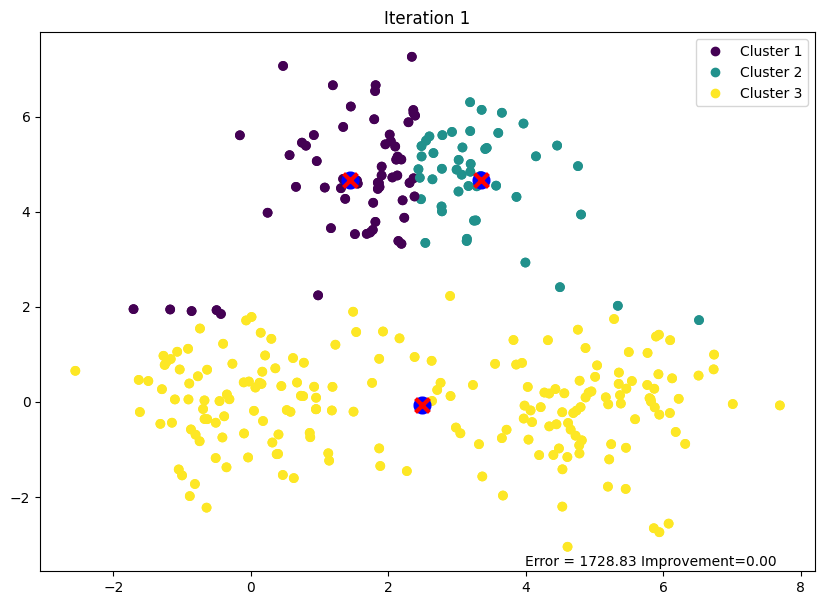

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from PIL import Image

# set the seed to reproduce the results
np.random.seed(0)

# Generate random data with 3 clusters and 100 samples with 2 features using gaussian mixture model
X = np.random.multivariate_normal([0, 0], [[1, 0], [0, 1]], 100)
X = np.concatenate((X, np.random.multivariate_normal([2.5, 5], [[1, 0], [0, 1]], 100)))
X = np.concatenate((X, np.random.multivariate_normal([5, 0], [[1, 0], [0, 1]], 100)))  

# Set initial cluster centers to be far away from the actual cluster centers
global old_centers, old_inertia
old_centers = np.array([[2,4],[3,4],[2.5,0]])
old_inertia = 10000

# Create a figure and axis object for the animation
fig, ax = plt.subplots(figsize=(10, 7))

# Define a function to update the plot for each iteration of the for loop
def update_plot(i):
    global old_centers, old_inertia
    # run the KMeans for 1 iteration so we can follow the clustering process
    kmeans = KMeans(n_clusters=3, init=old_centers, max_iter=1, n_init=1).fit(X)
    new_centers = kmeans.cluster_centers_
    new_inertia = kmeans.inertia_
    # clear the axis object for the new plot
    ax.clear()
    # plot the data points and cluster centers
    ax.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)
    # plot the inertia value as a text box on the plot
    ax.text(0.95, 0.01, f'Error = {kmeans.inertia_:.2f} Improvement={old_inertia-new_inertia:.2f}', transform=ax.transAxes, size=10, horizontalalignment='right')
    # add legend to the plot for the cluster labels
    ax.legend(handles=ax.scatter(X[:, 0], X[:, 1], c=kmeans.labels_).legend_elements()[0], labels=['Cluster 1', 'Cluster 2', 'Cluster 3'])
    # plot old and new cluster centers wiht arrows from old to new centers 
    for j in range(len(old_centers)):
        ax.arrow(old_centers[j, 0], old_centers[j, 1], new_centers[j, 0]-old_centers[j, 0], new_centers[j, 1]-old_centers[j, 1], head_width=0.1, head_length=0.1, fc='k', ec='k')
    ax.scatter(old_centers[:, 0], old_centers[:, 1], marker='o', s=100, linewidths=3, color='b')
    ax.scatter(new_centers[:, 0], new_centers[:, 1], marker='x', s=100, linewidths=3, color='r')

    ax.set_title('Iteration {}'.format(i+1))

    # update the old centers and inertia for the next iteration
    old_centers = new_centers
    old_inertia = new_inertia

# Create the animation object and save it to a file
ani = FuncAnimation(fig, update_plot, frames=10, interval=1000)
ani.save('animations\\k-means-clustering-animation-2.gif', writer='pillow')